- *Sıcaklık veri seti üzerinde, lineer regresyon varsayımlarını kontrol ediniz.*

In [130]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [116]:
df = pd.read_csv("weatherHistory.csv")

In [117]:
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


#### MODEL

In [149]:
Y = df['Temperature (C)']
X = df[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]

In [162]:
model = LinearRegression().fit(X, Y)
prediction = model.predict(X)

In [151]:
print('Değişkenler:', model.coef_)
print('Sabit Değer:', model.intercept_)

Değişkenler: [-3.24398999e+01 -1.94546893e-01 -7.15579969e-04]
Sabit Değer: 38.593799350544465


In [152]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                 2.314e+04
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        02:15:45   Log-Likelihood:            -3.2838e+05
No. Observations:               96453   AIC:                         6.568e+05
Df Residuals:                   96449   BIC:                         6.568e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   38.5938      0.231    167.305      0.000      38.142      39.046
Humidity               -32.4399      0.123   -263.447      0.000     -32.681     -32.199
Wind Speed (km/h)       -0.1945      0.003    -55.813      0.000      -0.201      -0.188
Pressure (millibars)    -0.0007      0.000     -3.565      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     3420.508   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3852.043
Skew:                          -0.458   Prob(JB):                         0.00
Kurtosis:                       3.346   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Varsayım 1
Modelin katsayıları ve hedefi lineer olmalıdır.

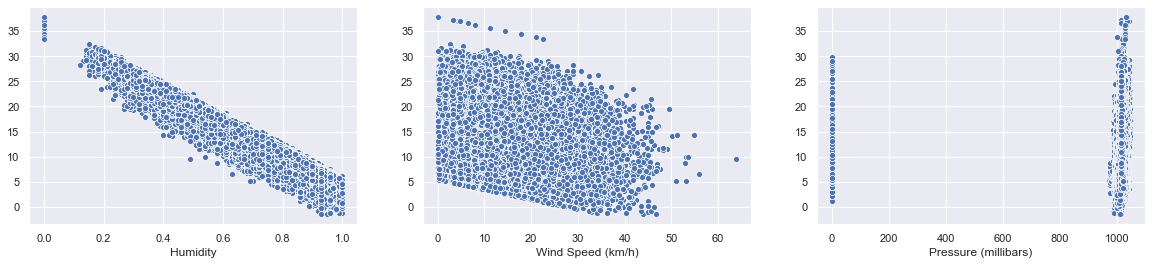

In [165]:
feat = ['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']
plt.figure(figsize=(20,4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[feat[i]], y=prediction)
    plt.ylabel('')
    plt.xlabel(feat[i])

#### Varsayım 2
Hata terimlerinin ortalaması 0 olmalıdır.

In [153]:
errors = Y - prediction

In [154]:
print("Ortalama Hata: {:.19f}".format(np.mean(errors)))

Ortalama Hata: 0.0000000000000014144


#### Varsayım 3
Modelin homoscedasticity davranış sergilemesi beklenir.
- Grafikten varyansın büyüdüğü görülüyor ve p-değerleri 0.05'den küçüktür; heteroscedastic davranış sergilemektedir.

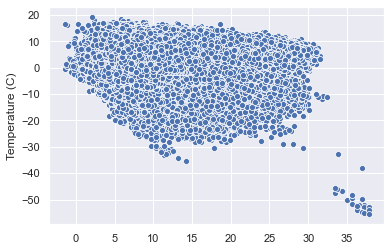

In [168]:
sns.scatterplot(x=prediction, y=errors)
plt.show()

In [75]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(prediction, errors)
lev_stats = levene(prediction, errors)

print("Bartlett Değeri: {0:3g} ve p değeri : {1:.15f}".format(bart_stats[0], bart_stats[1]))
print("Levene Değeri  : {0:3g} ve p değeri : {1:.15f}".format(lev_stats[0], lev_stats[1]))

Bartlett Değeri: 2595.34 ve p değeri : 0.000000000000000
Levene Değeri  : 2435.45 ve p değeri : 0.000000000000000


#### Varsayım 4

Özelliklerin birbiriyle zayıf ilişkisi (low multicollinearity) olmalıdır. 

In [110]:
X.corr()

,Humidity,Wind Speed (km/h),Pressure (millibars)
Humidity,1.000000,-0.224951,0.005454
Wind Speed (km/h),-0.224951,1.000000,-0.049263
Pressure (millibars),0.005454,-0.049263,1.000000


#### Varsayım 5
Hata terimleri birbiriyle ilişkisiz olmalıdır.
- Otokorelasyon grafiğine göre ilişki seviyesi yüksektir.

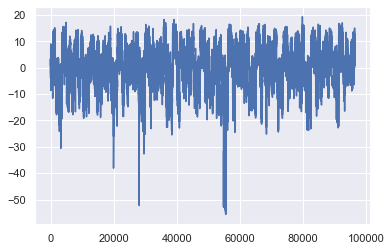

In [80]:
plt.plot(errors)
plt.show()

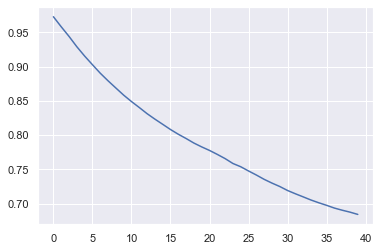

In [85]:
from statsmodels.tsa.stattools import acf

plt.plot(acf(errors)[1:])
plt.show()

#### Varsayım 6
Özellikler hatalarla ilişkili olmamalıdır.

In [87]:
df['Errors'] = errors
exogeneity = df[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Errors']]
exogeneity.corr()

,Humidity,Wind Speed (km/h),Pressure (millibars),Errors
Humidity,1.000000e+00,-2.249515e-01,5.454263e-03,-5.896447e-15
Wind Speed (km/h),-2.249515e-01,1.000000e+00,-4.926281e-02,1.582410e-15
Pressure (millibars),5.454263e-03,-4.926281e-02,1.000000e+00,3.501466e-16
Errors,-5.896447e-15,1.582410e-15,3.501466e-16,1.000000e+00


#### Hataların Normalliği
Hata terimleri normal olarak dağıtılmalıdır.
- Modelin hatalarının normal(lineer grafik, çan eğrisi, p-değeri = 0) dağılmadığı görülmektedir. 

In [88]:
randomNumber = np.random.normal(np.mean(errors), np.std(errors), len(errors))

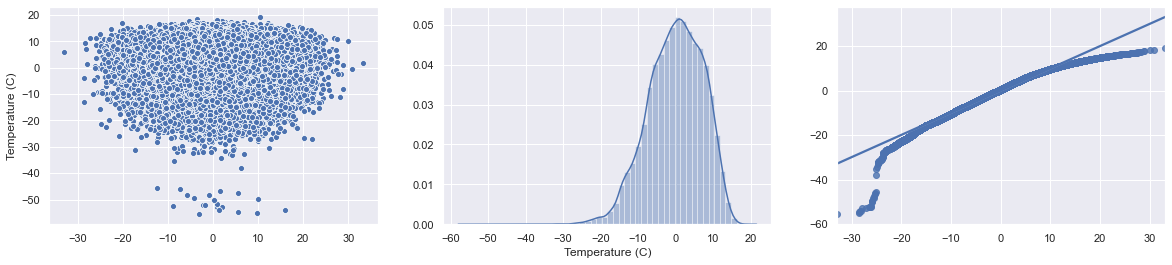

In [176]:
plt.figure(figsize=(20,4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=randomNumber, y=errors)
plt.subplot(1, 3, 2)
sns.distplot(errors)
plt.subplot(1, 3, 3)
sns.regplot(np.sort(randomNumber), np.sort(errors))
plt.show()

In [104]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [109]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test değeri : {0:.6f} ve p değeri : {1:.15f}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0:.6f} ve p değeri : {1:.15f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3852.043001 ve p değeri : 0.000000000000000
Normal test değeri      : 3420.507783 ve p değeri : 0.000000000000000
